In [498]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [414]:
path='/Users/qurbamushtaq/Desktop/UEFA.xlsx'
df = pd.read_excel(path)
# Assuming 'df' is the DataFrame where you are seeing the numerical counting
df = df.reset_index(drop=True)



In [415]:
goal=pd.read_excel(path,sheet_name='goals')
manager=pd.read_excel(path,sheet_name='managers')
match=pd.read_excel(path,sheet_name='matches')
player=pd.read_excel(path,sheet_name='players')
stadium=pd.read_excel(path,sheet_name='stadiums')
team=pd.read_excel(path,sheet_name='teams')

In [416]:
print(goal.head(2))

  GOAL_ID MATCH_ID      PID  DURATION  ASSIST          GOAL_DESC
0   gl470    mt154  ply1479         4  ply864  right-footed shot
1   gl471    mt154  ply1075        28  ply864            penalty


In [417]:
print(manager.head(2))

  FIRST_NAME  LAST_NAME  NATIONALITY        DOB      TEAM
0    Stefano      Pioli        Italy 1965-10-19  AC Milan
1     Alfred  Schreuder  Netherlands 1972-11-02  AFC Ajax


In [418]:
print(match.head(2))


  MATCH_ID     SEASON                        DATE_TIME        HOME_TEAM   
0      mt1  2021-2022  15-SEP-21 08.00.00.000000000 PM  Manchester City  \
1      mt2  2021-2022  15-SEP-21 08.00.00.000000000 PM   Club Brugge KV   

             AWAY_TEAM              STADIUM  HOME_TEAM_SCORE  AWAY_TEAM_SCORE   
0           RB Leipzig       Etihad Stadium                6                3  \
1  Paris Saint-Germain  Jan Breydel Stadion                1                1   

   PENALTY_SHOOT_OUT  ATTENDANCE  
0                  0       38062  
1                  0       27546  


In [419]:
print(player.head(2))


  PLAYER_ID FIRST_NAME LAST_NAME NATIONALITY        DOB      TEAM   
0    ply510        NaN    Danilo      Brazil 1991-07-15  Juventus  \
1    ply511  Mattia De   Sciglio       Italy 1992-10-20  Juventus   

   JERSEY_NUMBER  POSITION  HEIGHT  WEIGHT FOOT  
0            6.0  Defender   184.0    78.0    R  
1            2.0  Defender   182.0    78.0    R  


In [420]:
print(stadium.head(2))



                  NAME       CITY      COUNTRY  CAPACITY
0      Giuseppe Meazza     Milano        Italy   75923.0
1  Johan Cruijff ArenA  Amsterdam  Netherlands   54990.0


In [421]:
print(team.head(2))

  TEAM_NAME      COUNTRY         HOME_STADIUM
0  AC Milan        Italy      Giuseppe Meazza
1  AFC Ajax  Netherlands  Johan Cruijff ArenA


In [422]:
print(goal.head(2))

  GOAL_ID MATCH_ID      PID  DURATION  ASSIST          GOAL_DESC
0   gl470    mt154  ply1479         4  ply864  right-footed shot
1   gl471    mt154  ply1075        28  ply864            penalty


In [423]:
# to make the data consistent, we are converting the column names into lower case
def lower(df):
    df.columns = df.columns.str.lower()
    return df

In [424]:
goal=lower(goal)
print(goal.head(3))

  goal_id match_id      pid  duration  assist          goal_desc
0   gl470    mt154  ply1479         4  ply864  right-footed shot
1   gl471    mt154  ply1075        28  ply864            penalty
2   gl472    mt154   ply585        69  ply864  right-footed shot


In [425]:
goal=lower(goal)
team=lower(team)
manager=lower(manager)
stadium=lower(stadium)
player=lower(player)
match=lower(match)


In [431]:

team_stad = team.merge(stadium, left_on = 'home_stadium', right_on = 'name')
match = match.merge(stadium, left_on = 'stadium', right_on = 'name', how = 'left')
goals = goal.merge(match[['match_id', 'home_team','away_team','season']]).merge(player[['player_id','position','foot', 'last_name']],left_on = 'pid',right_on = 'player_id',how = 'left')


In [440]:
winner = []

for homeWin, awayWin,homeTeam, awayTeam in zip(match['home_team_score'], match['away_team_score'],match['home_team'],match['away_team']):
    if homeWin > awayWin:
        winner.append(homeTeam)
    elif awayWin > homeWin:
        winner.append(awayTeam)
    else:
        winner.append('draw')

match['winner']=winner
winners=match['winner'].value_counts().nlargest(20)[1:].reset_index()
winners.columns=['winner','number Of Wins']
#plotting the graph
px.bar(data_frame=winners,x='number Of Wins', y='winner', orientation='h', title="Top 20 winners of UEFA", color='number Of Wins')





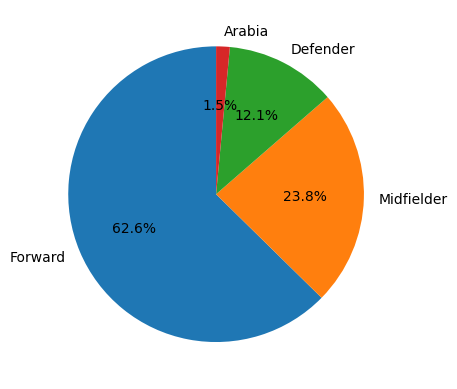

In [441]:
# At what position the most goals were scored

position=goals['position'].value_counts().nlargest(4).reset_index()
position.columns=['Position','Total number']
total=np.array(position['Total number'])
posi=list(position['Position'])
plt.pie(total,labels=posi, startangle=90, autopct='%1.1f%%')
plt.show()

In [442]:
# Maximum attendees in which stadium and whose match was it and who won
populated = []
match['populated'] = round((match['attendance'] * 100) / match['capacity_x'],2)
populated = match['populated'].nlargest(5).index

print('These are the games with the highest attendance:')
for i in populated:
    print('The game was ' + str(match.loc[i, 'home_team']) + " vs " + str(match.loc[i, 'away_team']) + ", the stadium was " + str(match.loc[i, 'stadium']) + ', and the attendance percentage was ' + str(match.loc[i, 'populated']))


These are the games with the highest attendance:
The game was CSKA Moskva vs Tottenham Hotspur, the stadium was Arena Khimki, and the attendance percentage was 140.34
The game was Liverpool FC vs FC Barcelona, the stadium was Anfield, and the attendance percentage was 102.1
The game was Manchester United vs Sevilla FC, the stadium was Old Trafford, and the attendance percentage was 101.04
The game was Manchester United vs CSKA Moskva, the stadium was Old Trafford, and the attendance percentage was 100.71
The game was Villarreal CF vs Liverpool FC, the stadium was Estadio de la Cerámica, and the attendance percentage was 100.7


In [436]:
# Total matches in all seasons
totalSeasons=match['season'].value_counts()
print(totalSeasons)

print('Due to corona virus, there were only 119 matches instead of usual 125 matches')

season
2021-2022    125
2020-2021    125
2018-2019    125
2017-2018    125
2016-2017    125
2019-2020    119
Name: count, dtype: int64
Due to corona virus, there were only 119 matches instead of usual 125 matches


<BarContainer object of 16 artists>

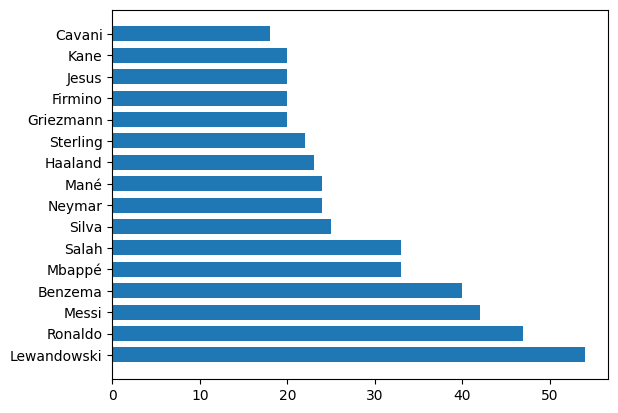

In [437]:
# most scorer
scorer = np.array(goals['last_name'].value_counts().nlargest(16).values)
scorerName = np.array(goals['last_name'].value_counts().nlargest(16).index)
plt.barh(scorerName,scorer,height=0.7,label=' Top 16 scorer of UEFA')



In [396]:
# In which stadium most matches are won



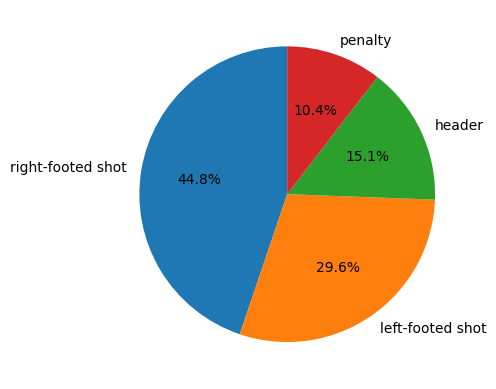

In [438]:
# type of different shots

type1=list(goal['goal_desc'])
type1=goal['goal_desc'].value_counts().nlargest(4).reset_index()
type1.columns=['type of goal','total Number']
numbers=list(type1['total Number'])
typeOfGoal=list(type1['type of goal'])
y=np.array(numbers)
plt.pie(y, labels=typeOfGoal,startangle = 90, autopct='%1.1f%%')
plt.show()

In [444]:
#clubs that has the most matches
clubs=match[['home_team','away_team']].stack().value_counts()[:20].reset_index()
clubs.columns=['club','attended']

px.bar(data_frame=clubs,x='attended', y='club', orientation='h', title="Top 20 Club with most matches", color='club')



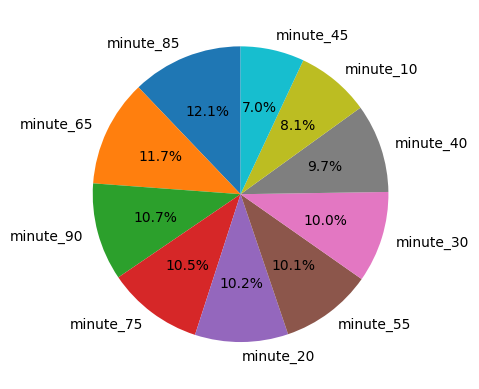

In [478]:
# goals in different period
goals['minutes']=pd.cut(goals['duration'], bins=[0,10,20,30,40,45,55,65,75,85,90,105,130],labels=['minute_10','minute_20','minute_30','minute_40','minute_45','minute_55','minute_65','minute_75','minute_85','minute_90','minute_110','minute_130'])
counting=goals['minutes'].value_counts().nlargest(10).reset_index()
counting.columns=['duration','countingss']
names1=list(counting['duration'])
tracing=np.array(list(counting['countingss']))
plt.pie(tracing, labels=names1,startangle = 90, autopct='%1.1f%%')
plt.show()

In [487]:
# left and root foot

print(goals['foot'].value_counts())
print('Most of the goals are scored by the right foot')

foot
R    1447
L     553
Name: count, dtype: int64
 Most of the goals are scored by the right foot


In [500]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

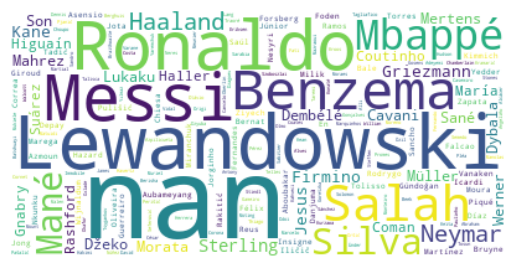

In [505]:
opwords = set(STOPWORDS)
words = " ".join(str(title) for title in goals['last_name'])
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(words)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
